In [1]:
import matplotlib.pyplot as plt
import json
import itertools
import re
import pandas as pd
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch

In [2]:

speed = [5704,10716,29380]
result = {}
# for packet stats
loop = 1
time = 7200
app_gen_time = [i for i in range(1,60,1)]
# set the packet generation period to 15s to simulate the normal traffic
# read the stats from json
# simulation period 3600
# MAC_QUEUE_SIZE: 5
# MAC_KEEPALIVE_TIMEOUT_S: 0
# MAC_DESYNC_THRESHOLD_S: 0
# APP_PACKET_PERIOD_SEC: 3
for i in speed:
    title = '{}'.format(i)
    result[title] = {}
    result[title]["app-packets-sent"] = {}
    result[title]["app-packets-received"] = {}
    result[title]["PDR_in_percent"] = {}
    result[title]["latency"] = {}
    result[title]["latency_max"] = {}
    result[title]["latency_min"] = {}
    result[title]["app-packets-lost"] = {}
    result[title]["current-consumed-after-joining"] = {}
    result[title]["current-consumed"] = {}
    for gen in app_gen_time:
        result[title]["app-packets-sent"][str(gen)] = []
        result[title]["app-packets-received"][str(gen)] = []
        result[title]["PDR_in_percent"][str(gen)] = []
        result[title]["latency"][str(gen)] = []
        result[title]["latency_max"][str(gen)] = []
        result[title]["latency_min"][str(gen)] = []
        result[title]["app-packets-lost"][str(gen)] = []
        result[title]["current-consumed-after-joining"][str(gen)] = []
        result[title]["current-consumed"][str(gen)] = []
        for j in range(loop):
            with open('./examples/mesh/results/single_model_diff_packet_period/{}s-{}-{}-{}/stats.json'.format(time,i,gen,j),'r') as f:
                data = json.load(f)
                result[title]["app-packets-sent"][str(gen)].append(float(data["global-stats for this duration"]["app-packets-sent"][0]["total"]))
                result[title]["app-packets-received"][str(gen)].append(float(data["global-stats for this duration"]["app-packets-received"][0]["total"]))
                result[title]["app-packets-lost"][str(gen)].append(float(data["global-stats for this duration"]["app-packets-lost"][0]["total"]))
                result[title]["PDR_in_percent"][str(gen)].append(float(data["global-stats for this duration"]["e2e-delivery"][0]["value"]))
                result[title]["latency"][str(gen)].append(float(data["global-stats for this duration"]["e2e-latency"][0]["mean"]))
                result[title]["latency_max"][str(gen)].append(float(data["global-stats for this duration"]["e2e-latency"][0]["max"]))
                result[title]["latency_min"][str(gen)].append(float(data["global-stats for this duration"]["e2e-latency"][0]["min"]))
                result[title]["current-consumed"][str(gen)].append(float(data["global-stats for this duration"]["current-consumed"][0]["mean"]))
                result[title]["current-consumed-after-joining"][str(gen)].append(float(data["global-stats for this duration"]["current-consumed-when-joined"][0]["mean"]))
    #print(result[title])
    
# for link stats
for i in speed:
    title = '{}'.format(i)
    result[title]["PAR"] = {}
    result[title]["tx"] = {}
    result[title]["acked"] = {}
    result[title]["collision rate"] = {}
    result[title]["mac_rx"] = {}
    result[title]["mac_rx_collision"] = {}
    result[title]["duty_cycle"] = {}

    for gen in app_gen_time:
        result[title]["PAR"][str(gen)] = []
        result[title]["tx"][str(gen)] = []
        result[title]["acked"][str(gen)] = []
        result[title]["collision rate"][str(gen)] = []
        result[title]["mac_rx"][str(gen)] = []
        result[title]["mac_rx_collision"][str(gen)] = []
        result[title]["duty_cycle"][str(gen)] = []

        for j in range(loop):
            with open('./examples/mesh/results/single_model_diff_packet_period/{}s-{}-{}-{}/log.txt'.format(time,i,gen,j),'r') as f: 
                text = f.read()
                result[title]["PAR"][str(gen)].append(float(re.findall('PAR=(.+)% tx=.+ acked=.+',text)[0]))
                result[title]["tx"][str(gen)].append(float(re.findall('PAR=.+% tx=(.+) acked=.+',text)[0]))
                result[title]["acked"][str(gen)].append(float(re.findall('PAR=.+% tx=.+ acked=(.+)',text)[0]))
                result[title]["collision rate"][str(gen)].append(float(re.findall('collision rate =(.+)',text)[0]))
                result[title]["mac_rx"][str(gen)].append(float(re.findall('mac_rx_collision=.+,mac_rx = (.+),collision rate =.+',text)[0]))
                result[title]["mac_rx_collision"][str(gen)].append(float(re.findall('mac_rx_collision=(.+),mac_rx = .+,collision rate =.+',text)[0]))
                result[title]["duty_cycle"][str(gen)].append(float(re.findall("duty_cycle_joined_average=(.+)",text)[0]))
'''for i in range(len(speed)):
    title = '{}'.format(speed[i]
    print(np.mean(result[title]["acked"]))
    print(np.mean(result[title]["tx"]))
    print(np.mean(result[title]["PAR"]))'''

'for i in range(len(speed)):\n    title = \'{}\'.format(speed[i]\n    print(np.mean(result[title]["acked"]))\n    print(np.mean(result[title]["tx"]))\n    print(np.mean(result[title]["PAR"]))'

In [3]:
result['29380']["app-packets-received"]

{'1': [2893.0],
 '2': [4649.0],
 '3': [5616.0],
 '4': [4217.0],
 '5': [3370.0],
 '6': [2841.0],
 '7': [2449.0],
 '8': [2159.0],
 '9': [1933.0],
 '10': [1737.0],
 '11': [1582.0],
 '12': [1452.0],
 '13': [1340.0],
 '14': [1247.0],
 '15': [1161.0],
 '16': [1093.0],
 '17': [1028.0],
 '18': [971.0],
 '19': [920.0],
 '20': [871.0],
 '21': [831.0],
 '22': [794.0],
 '23': [759.0],
 '24': [729.0],
 '25': [697.0],
 '26': [672.0],
 '27': [647.0],
 '28': [624.0],
 '29': [603.0],
 '30': [580.0],
 '31': [565.0],
 '32': [546.0],
 '33': [528.0],
 '34': [515.0],
 '35': [499.0],
 '36': [487.0],
 '37': [473.0],
 '38': [459.0],
 '39': [450.0],
 '40': [437.0],
 '41': [429.0],
 '42': [415.0],
 '43': [408.0],
 '44': [396.0],
 '45': [388.0],
 '46': [380.0],
 '47': [372.0],
 '48': [365.0],
 '49': [357.0],
 '50': [350.0],
 '51': [342.0],
 '52': [337.0],
 '53': [330.0],
 '54': [325.0],
 '55': [317.0],
 '56': [310.0],
 '57': [308.0],
 '58': [303.0],
 '59': [298.0]}

In [4]:
# write into a file for save
json_str = json.dumps(result)
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','w') as f:
    f.write(json_str)

In [5]:
processed_result = {}
for i in speed:
    title = '{}'.format(i)
    processed_result[title] = {}
    processed_result[title]["PAR"] = []
    processed_result[title]["tx"] = []
    processed_result[title]["acked"] = []
    processed_result[title]['PDR_in_percent'] = []
    processed_result[title]["current-consumed-after-joining"] = []
    processed_result[title]["app-packets-received"] = []
    processed_result[title]["collision rate"] = []
    processed_result[title]["mac_rx"] = []
    processed_result[title]["mac_rx_collision"] = []
    processed_result[title]["latency"] = []
    processed_result[title]["latency_max"] = []
    processed_result[title]["latency_min"] = []
    processed_result[title]["duty_cycle"] = []
    for gen in app_gen_time:
        processed_result[title]["PAR"].append(np.mean(result[title]["PAR"][str(gen)]))
        processed_result[title]["tx"].append(np.mean(result[title]["tx"][str(gen)]))
        processed_result[title]["acked"].append(np.mean(result[title]["acked"][str(gen)]))
        processed_result[title]["PDR_in_percent"].append(np.mean(result[title]["PDR_in_percent"][str(gen)]))
        processed_result[title]["current-consumed-after-joining"].append(np.mean(result[title]["current-consumed-after-joining"][str(gen)]))
        processed_result[title]["app-packets-received"].append(np.mean(result[title]["app-packets-received"][str(gen)]))
        processed_result[title]["collision rate"].append(np.mean(result[title]["collision rate"][str(gen)]))
        processed_result[title]["mac_rx"].append(np.mean(result[title]["mac_rx"][str(gen)]))
        processed_result[title]["mac_rx_collision"].append(np.mean(result[title]["mac_rx_collision"][str(gen)]))
        processed_result[title]["latency"].append(np.mean(result[title]["latency"][str(gen)]))
        processed_result[title]["duty_cycle"].append(np.mean(result[title]["duty_cycle"][str(gen)]))
        processed_result[title]["latency_max"].append(np.mean(result[title]["latency_max"][str(gen)]))
        processed_result[title]["latency_min"].append(np.mean(result[title]["latency_max"][str(gen)]))



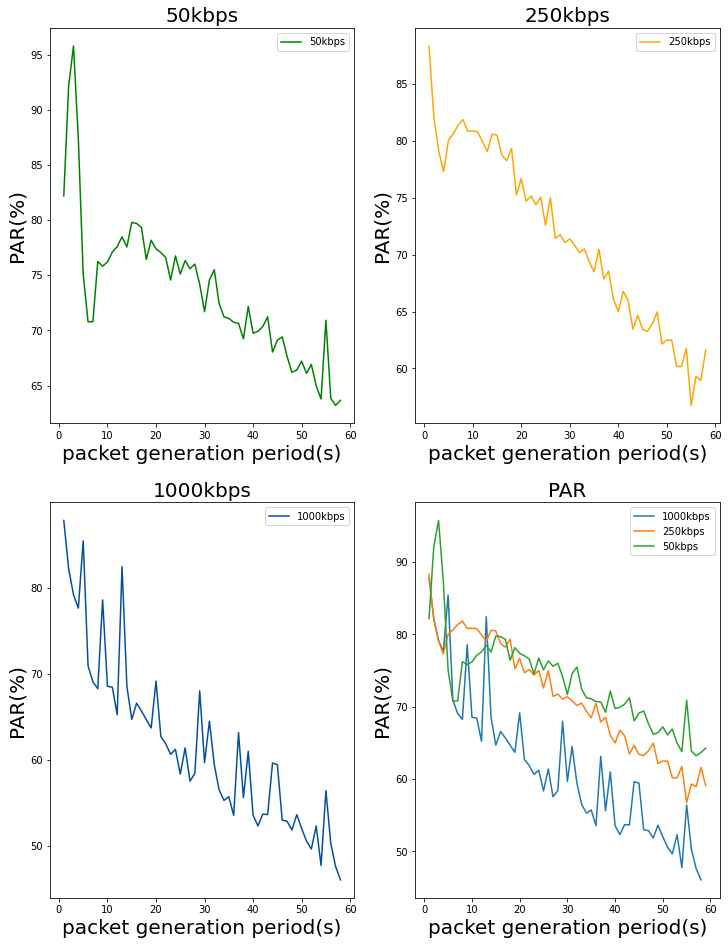

In [41]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)
period_range = [i for i in range(1,60,1)]
plt.figure(figsize=(12,16))

# PAR
plt.title('PAR',fontsize=20)
plt.subplot(2,2,1)
plt.plot(period_range[:58],processed_result['29380']['PAR'][:58],label='50kbps',color='green')
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel('PAR(%)',fontsize=20)
plt.legend()
plt.title('50kbps',fontsize=20)

plt.subplot(2,2,2)
plt.plot(period_range[:58],processed_result['10716']['PAR'][:58],label='250kbps',color='orange')
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel('PAR(%)',fontsize=20)
plt.legend()
plt.title('250kbps',fontsize=20)

plt.subplot(2,2,3)
plt.plot(period_range[:58],processed_result['5704']['PAR'][:58],label='1000kbps',color='#054E9F')
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel('PAR(%)',fontsize=20)
plt.legend()
plt.title('1000kbps',fontsize=20)

plt.subplot(2,2,4)
plt.plot(period_range[:58],processed_result['5704']['PAR'][:58],label='1000kbps')
plt.plot(period_range,processed_result['10716']['PAR'],label='250kbps')
plt.plot(period_range,processed_result['29380']['PAR'],label='50kbps')
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel('PAR(%)',fontsize=20)
plt.title('PAR',fontsize=20)
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
plt.savefig('./examples/mesh/single_model_diff_packet_period/PAR.jpg',bbox_inches = 'tight')
plt.show()

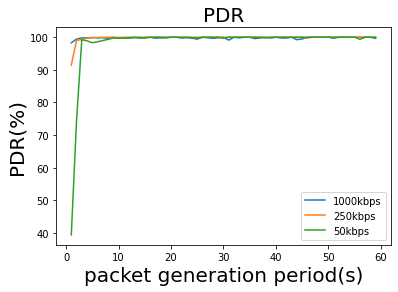

In [39]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# PDR
plt.title('PDR',fontsize=20)
plt.plot(period_range,processed_result['5704']['PDR_in_percent'],label='1000kbps')
plt.plot(period_range,processed_result['10716']['PDR_in_percent'],label='250kbps')
plt.plot(period_range,processed_result['29380']['PDR_in_percent'],label='50kbps')
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel('PDR(%)',fontsize=20)
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
plt.savefig('./examples/mesh/single_model_diff_packet_period/PDR.jpg',bbox_inches = 'tight')
plt.show()

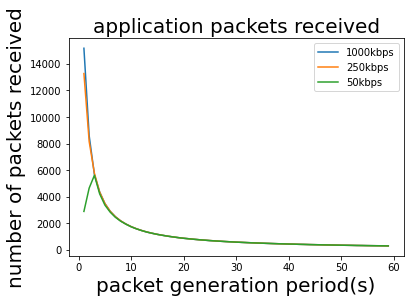

In [38]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# packets-received
plt.plot(period_range,processed_result['5704']['app-packets-received'],label='1000kbps')
plt.plot(period_range,processed_result['10716']['app-packets-received'],label='250kbps')
plt.plot(period_range,processed_result['29380']['app-packets-received'],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.title('application packets received',fontsize=20)
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel('number of packets received',fontsize=20)
plt.legend()
plt.savefig('./examples/mesh/single_model_diff_packet_period/app-packets-received.jpg',bbox_inches = 'tight')

plt.show()

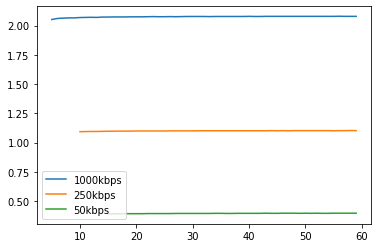

In [9]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# energy
plt.plot(period_range[4:],processed_result['5704']['current-consumed-after-joining'][4:],label='1000kbps')
plt.plot(period_range[9:],processed_result['10716']['current-consumed-after-joining'][9:],label='250kbps')
plt.plot(period_range[14:],processed_result['29380']['current-consumed-after-joining'][14:],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
plt.show()

In [10]:
#processed_result['29380']['current-consumed-after-joining']

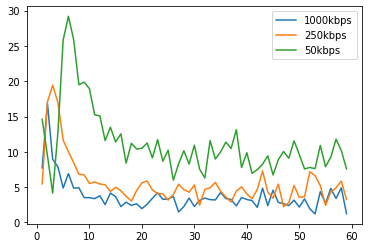

In [11]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# PAR
plt.plot(period_range,processed_result['5704']["collision rate"],label='1000kbps')
plt.plot(period_range,processed_result['10716']["collision rate"],label='250kbps')
plt.plot(period_range,processed_result['29380']["collision rate"],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
plt.show()

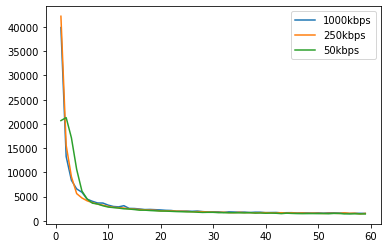

In [12]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# PDR
plt.plot(period_range,processed_result['5704']['mac_rx'],label='1000kbps')
plt.plot(period_range,processed_result['10716']['mac_rx'],label='250kbps')
plt.plot(period_range,processed_result['29380']['mac_rx'],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
plt.show()

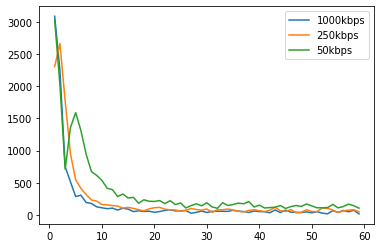

In [13]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# PDR
plt.plot(period_range,processed_result['5704']['mac_rx_collision'],label='1000kbps')
plt.plot(period_range,processed_result['10716']['mac_rx_collision'],label='250kbps')
plt.plot(period_range,processed_result['29380']['mac_rx_collision'],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.legend()
plt.show()

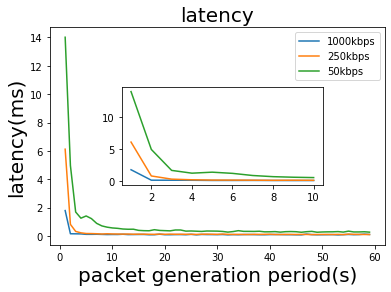

In [40]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# PAR
fig, ax = plt.subplots(1, 1)
ax.plot(period_range,processed_result['5704']['latency'],label='1000kbps')
ax.plot(period_range,processed_result['10716']['latency'],label='250kbps')
ax.plot(period_range,processed_result['29380']['latency'],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')

ax.legend()
plt.title('latency',fontsize=20)
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel('latency(ms)',fontsize=20)

axins = inset_axes(ax, width="40%", height="30%", loc='center left',
                   bbox_to_anchor=(0.2, -0.25, 1.5, 1.5), 
                   bbox_transform=ax.transAxes)
axins.plot(period_range[0:10],processed_result['5704']['latency'][0:10],label='1000kbps')
axins.plot(period_range[0:10],processed_result['10716']['latency'][0:10],label='250kbps')
axins.plot(period_range[0:10],processed_result['29380']['latency'][0:10],label='50kbps')





plt.savefig('./examples/mesh/single_model_diff_packet_period/latency.jpg',bbox_inches = 'tight')
plt.show()

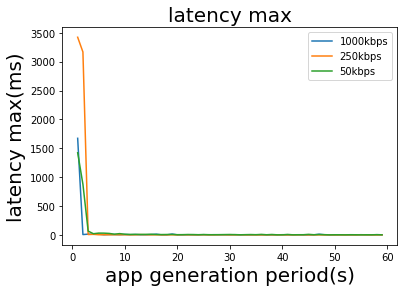

In [15]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# latency_max
plt.plot(period_range,processed_result['5704']['latency_max'],label='1000kbps')
plt.plot(period_range,processed_result['10716']['latency_max'],label='250kbps')
plt.plot(period_range,processed_result['29380']['latency_max'],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')

plt.legend()
plt.title('latency max',fontsize=20)
plt.xlabel('app generation period(s)',fontsize=20)
plt.ylabel('latency max(ms)',fontsize=20)
plt.savefig('./examples/mesh/single_model_diff_packet_period/latency_max.jpg',bbox_inches = 'tight')
plt.show()

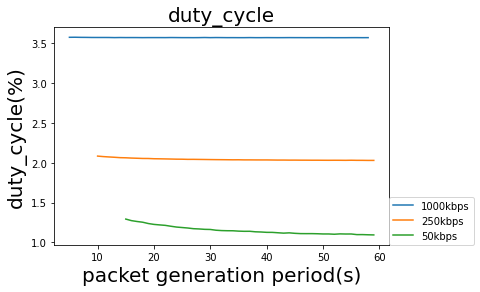

In [36]:
with open('./examples/mesh/single_model_diff_packet_period/single_model_diff_packet_period.json','r') as f:
    result = json.load(f)

# duty cycle
plt.plot(period_range[4:58],processed_result['5704']["duty_cycle"][4:58],label='1000kbps')
plt.plot(period_range[9:],processed_result['10716']["duty_cycle"][9:],label='250kbps')
plt.plot(period_range[14:],processed_result['29380']["duty_cycle"][14:],label='50kbps')
#plt.plot(period_range,processed_result['156900']['PAR'],label='8kbps')
plt.title("duty_cycle",fontsize=20)
plt.xlabel('packet generation period(s)',fontsize=20)
plt.ylabel("duty_cycle(%)",fontsize=20)
plt.legend(loc=[1, 0])
plt.savefig('./examples/mesh/single_model_diff_packet_period/duty_cycle.jpg',bbox_inches = 'tight')

plt.show()

In [17]:
duty_cycle_rx_idle=

SyntaxError: invalid syntax (<ipython-input-17-31d144dbb2d6>, line 1)